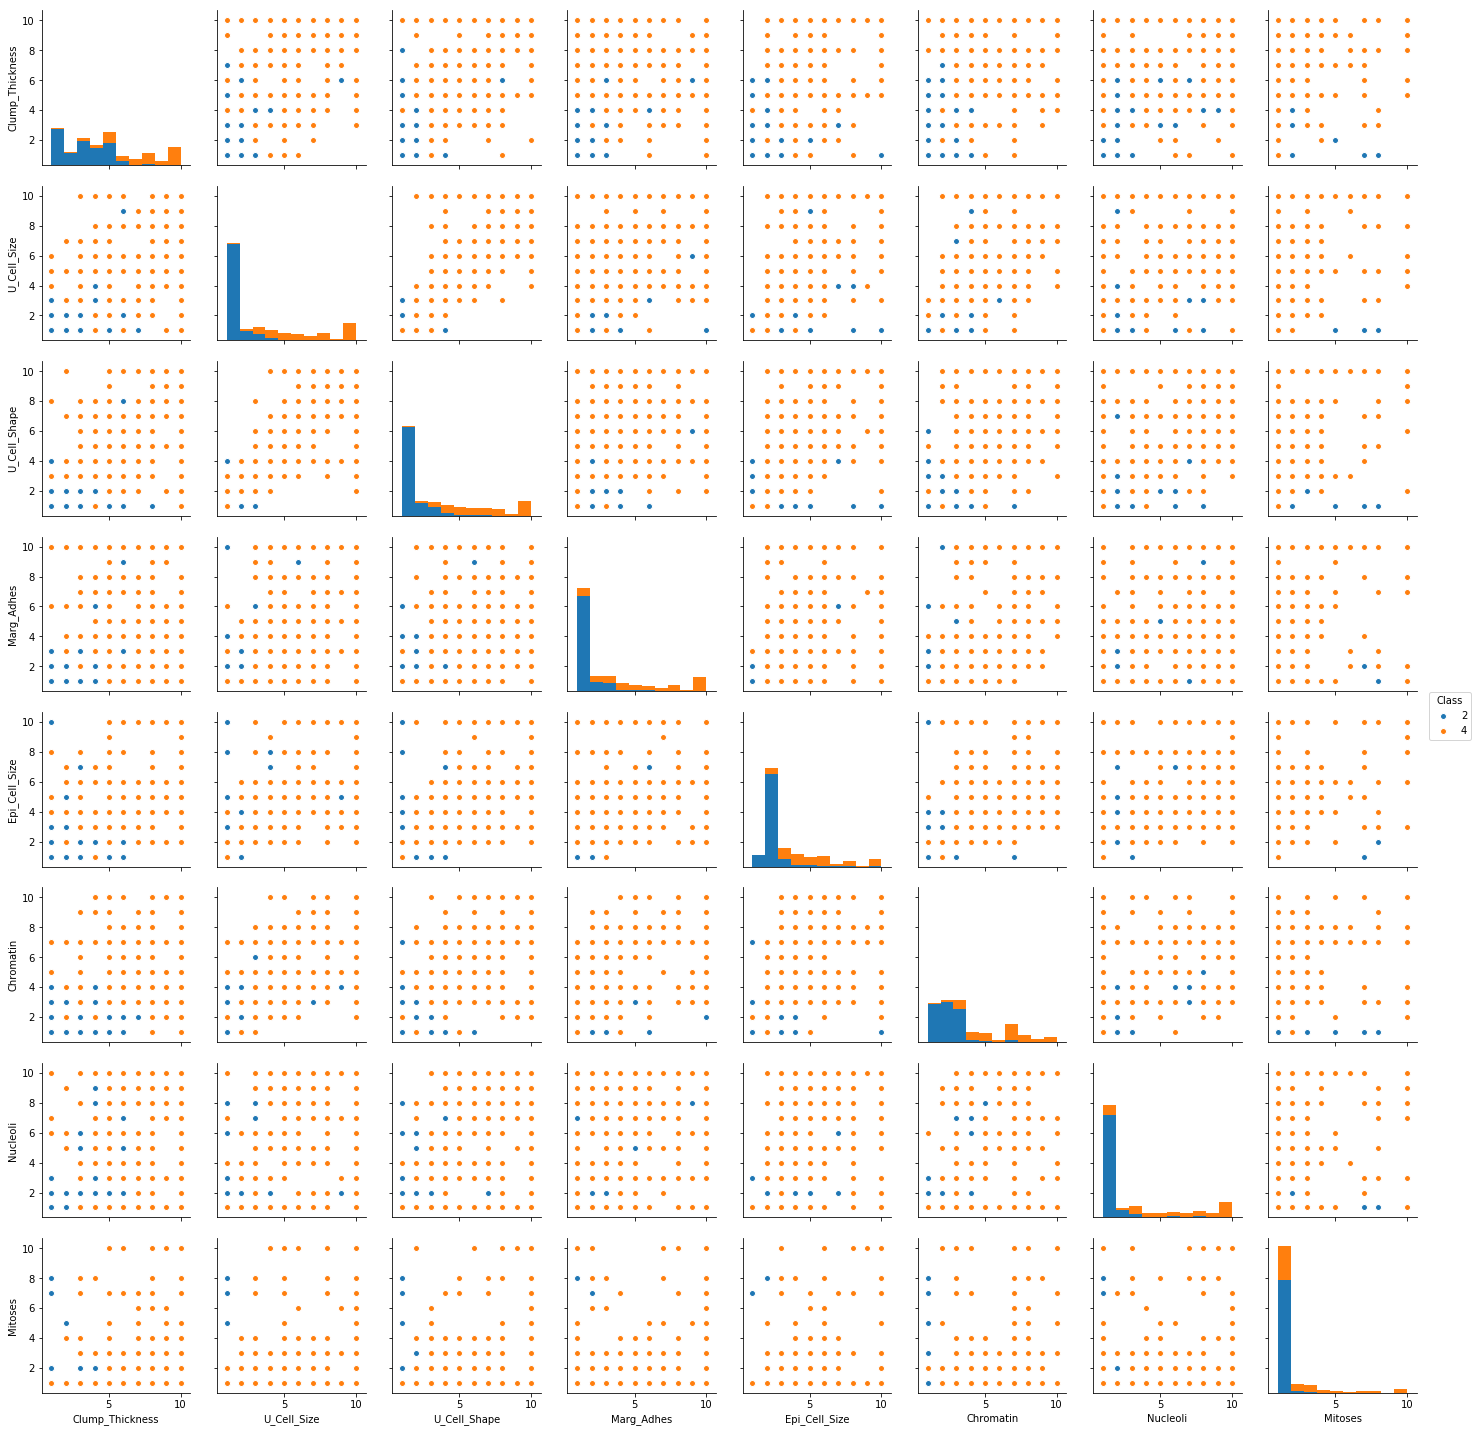

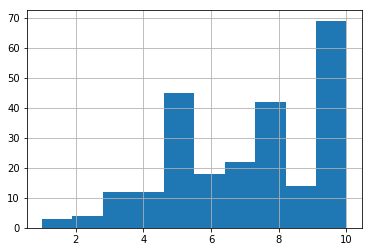

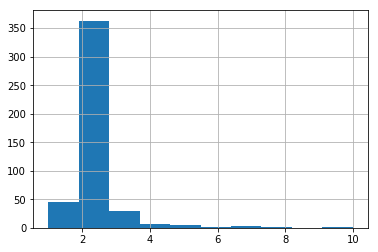

2.95633187773


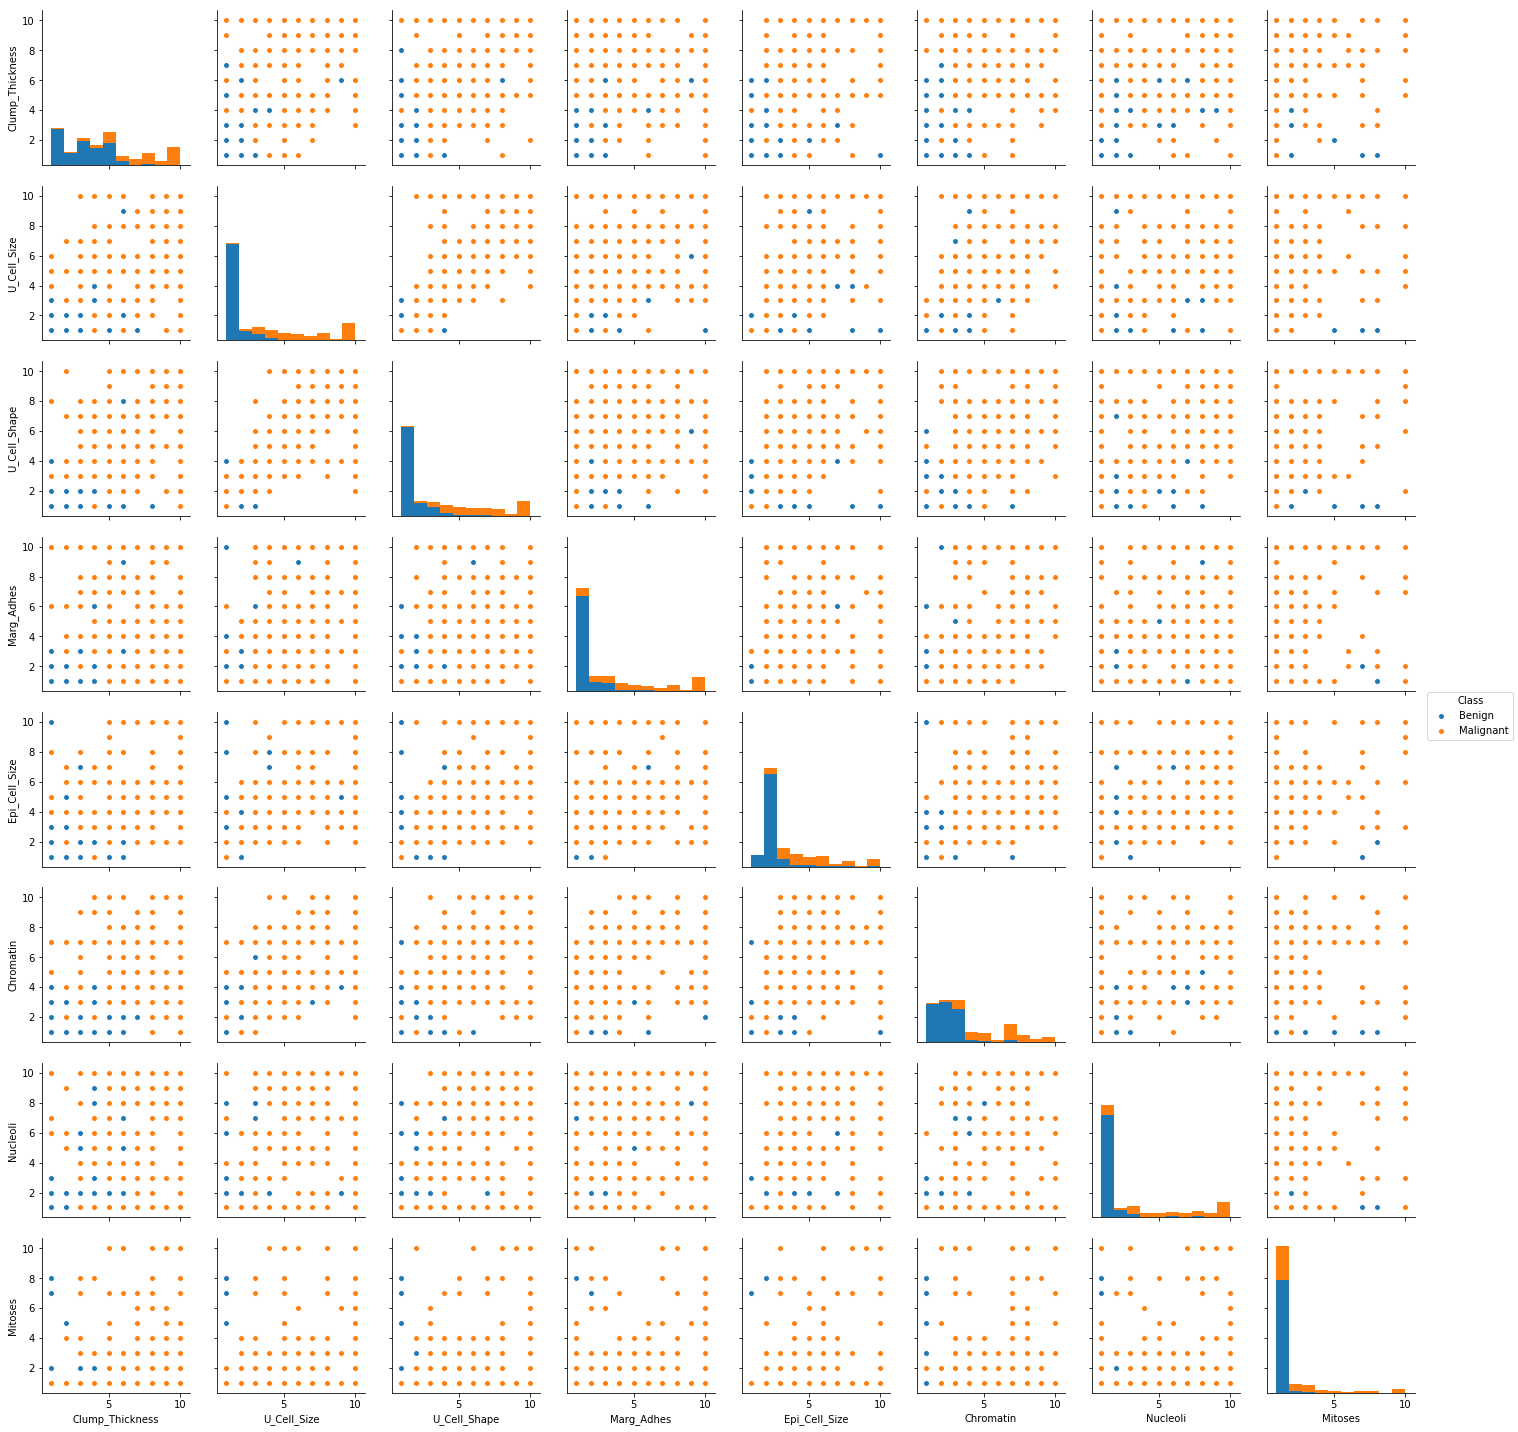

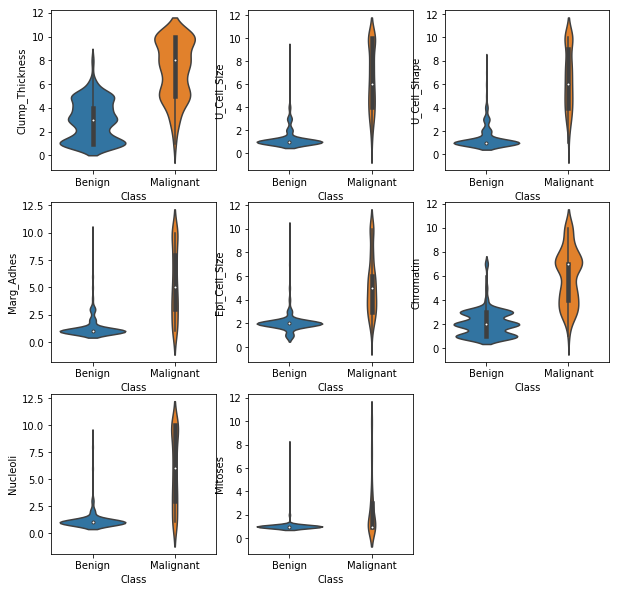

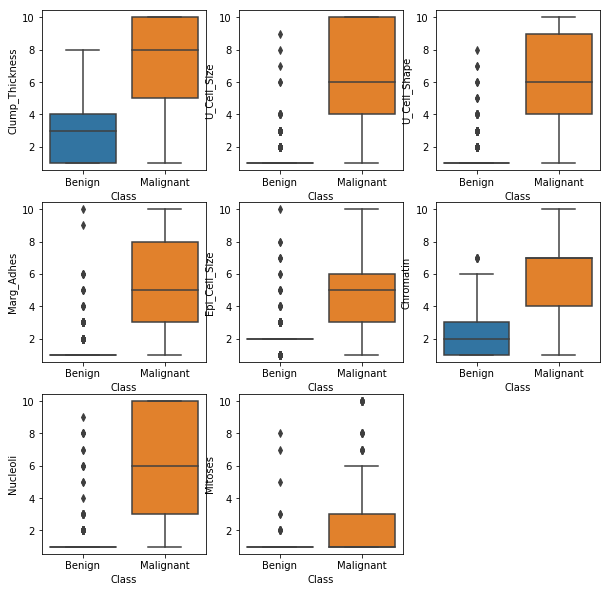

In [2]:
%run '15bce1287_lab1_ml.ipynb'

In [3]:
df.head(150)

,ID,Clump_Thickness,U_Cell_Size,U_Cell_Shape,Marg_Adhes,Epi_Cell_Size,Bare_Nuc,Chromatin,Nucleoli,Mitoses,Class
0,1000025,5.0,1,1,1,2,1,3,1,1,Benign
1,1002945,5.0,4,4,5,7,10,3,2,1,Benign
2,1015425,3.0,1,1,1,2,2,3,1,1,Benign
3,1016277,6.0,8,8,1,3,4,3,7,1,Benign
4,1017023,4.0,1,1,3,2,1,3,1,1,Benign
5,1017122,8.0,10,10,8,7,10,9,7,1,Malignant
6,1018099,1.0,1,1,1,2,10,3,1,1,Benign
7,1018561,2.0,1,2,1,2,1,3,1,1,Benign
8,1033078,2.0,1,1,1,2,1,1,1,5,Benign
9,1033078,4.0,2,1,1,2,1,2,1,1,Benign


In [18]:
import numpy as np


class Perceptron(object):
   
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
     
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)


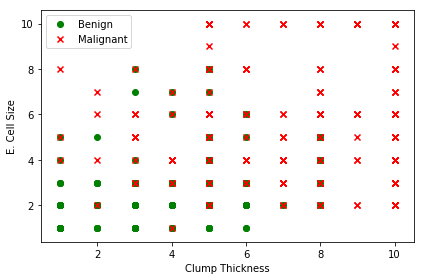

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select Belign and Malignant
y = df.iloc[0:, 10].values
y = np.where(y == 'Malignant', 1, -1)

X_Mali=df.loc[(df['Class']=='Malignant')]
X_Beni=df.loc[(df['Class']=='Benign')]

# extract Clump_Thickness and E_Cell_Size
X_Mali = X_Mali.iloc[0:, [1,5]].values
X_Beni = X_Beni.iloc[0:, [1,5]].values

# plot data
plt.scatter(X_Beni[0:, 0], X_Beni[0:, 1],
            color='green', marker='o', label='Benign')
plt.scatter(X_Mali[0:, 0], X_Mali[0:, 1],
            color='red', marker='x', label='Malignant')

plt.xlabel('Clump Thickness')
plt.ylabel('E. Cell Size')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./1.png', dpi=300)
plt.show()

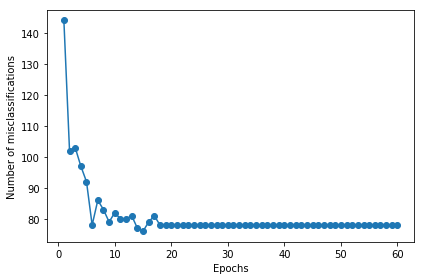

In [59]:
ppn = Perceptron(eta=0.1, n_iter=60)
X = df.iloc[0:, [1,5]].values
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

plt.tight_layout()
# plt.savefig('./perceptron_1.png', dpi=300)
plt.show()

In [68]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('green', 'red', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label='Benign' if cl == -1 else 'Malignant')


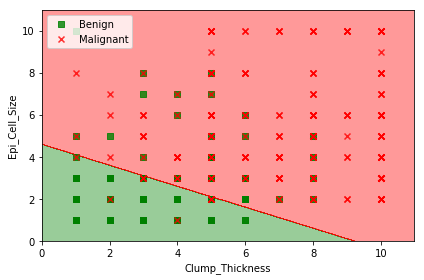

In [70]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Clump_Thickness')
plt.ylabel('Epi_Cell_Size')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()